# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
data_size = 'small'

In [4]:
df = pd.read_csv('/home/philippe/development/python project/EZStacking/dataset/Franck-Hertz.csv')

In [5]:
target_col = 'I'

#### Thresholds

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 5

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 0.95

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

#### Drop user's columns:

In [17]:
user_drop_cols = []

Dataset before deletion

In [18]:
display(df)

V     I
0     0.7  0.00
1     0.8  0.00
2     0.9  0.00
3     1.0  0.00
4     7.8  0.00
..    ...   ...
150  66.3  0.94
151  66.4  0.93
152  66.5  0.92
153  66.7  0.91
154  67.0  0.90

[155 rows x 2 columns]

In [19]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [20]:
display(df)

V     I
0     0.7  0.00
1     0.8  0.00
2     0.9  0.00
3     1.0  0.00
4     7.8  0.00
..    ...   ...
150  66.3  0.94
151  66.4  0.93
152  66.5  0.92
153  66.7  0.91
154  67.0  0.90

[155 rows x 2 columns]

#### Dataset copy

In [21]:
df_copy = df.copy()

### Dataset Information

In [22]:
df.shape

(155, 2)

#### Some records

In [23]:
display(df)

V     I
0     0.7  0.00
1     0.8  0.00
2     0.9  0.00
3     1.0  0.00
4     7.8  0.00
..    ...   ...
150  66.3  0.94
151  66.4  0.93
152  66.5  0.92
153  66.7  0.91
154  67.0  0.90

[155 rows x 2 columns]

#### Dataframe structure

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


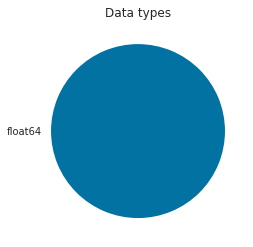

In [24]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [25]:
display(df.describe().T)

count       mean        std  min    25%    50%    75%    max
V  155.0  43.583871  16.147464  0.7  35.65  47.70  55.70  67.00
I  155.0   0.344645   0.241852  0.0   0.18   0.29   0.48   0.97

#### Which columns could be categorical ?

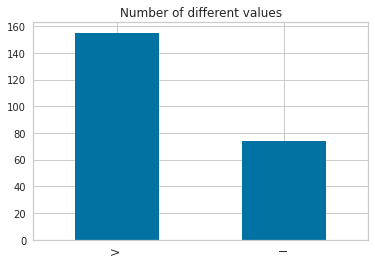

In [26]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [27]:
duplicates(df)

No duplicate rows.


V     I
0     0.7  0.00
1     0.8  0.00
2     0.9  0.00
3     1.0  0.00
4     7.8  0.00
..    ...   ...
150  66.3  0.94
151  66.4  0.93
152  66.5  0.92
153  66.7  0.91
154  67.0  0.90

[155 rows x 2 columns]

#### Drop NaN:

In [28]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [29]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [30]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [31]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: V
Encoding numeric column: I


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


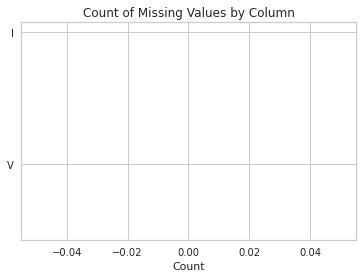

In [32]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [33]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [34]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.00MB
Memory usage after optimization is: 0.00MB
Decreased by 71.3%


##### Dataframe structure after compression

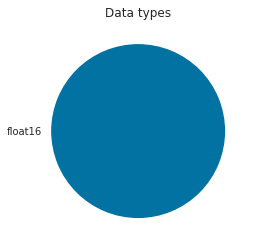

In [35]:
plot_dataframe_structure(df)

#### Outliers:

In [36]:
df = outliers(df, threshold_Z)

Using Z_score,  0  rows will be suppressed.


### Plottings

#### Ranking 

##### Ranking 1D 

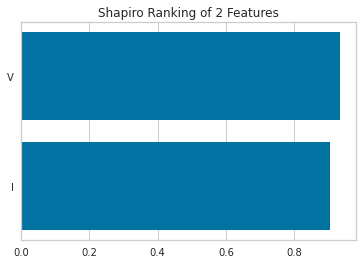

In [37]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

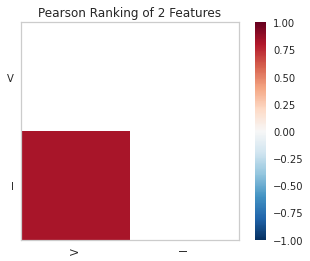

In [38]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

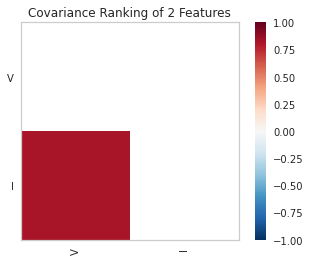

In [39]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Kendalltau

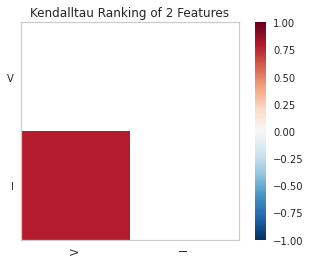

In [41]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [42]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [43]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [44]:
y = df[target_col]

In [45]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

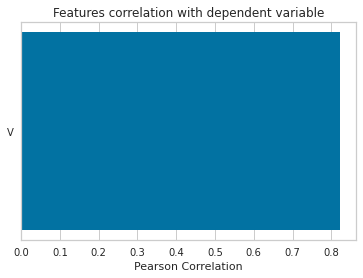

In [46]:
feature_correlation(X, y);

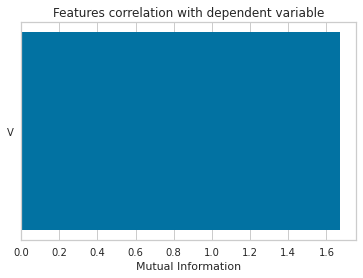

In [47]:
feature_correlation(X, y, method='mutual_info-regression');

###### Correlation with Seaborn

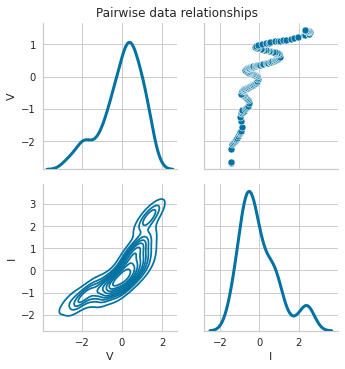

In [48]:
plot_sns_corr_regre(df, target_col)

###### Heatmap with Seaborn

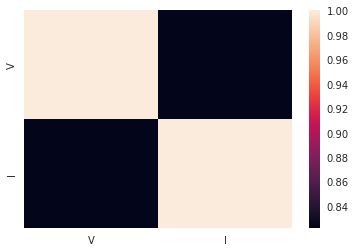

In [49]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

#### Feature importance (a priori)

##### According to decision tree

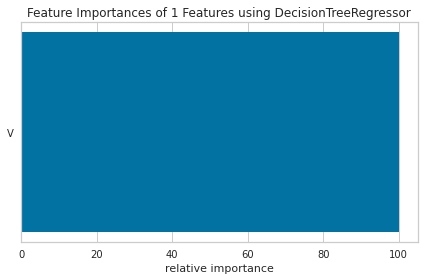

In [50]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

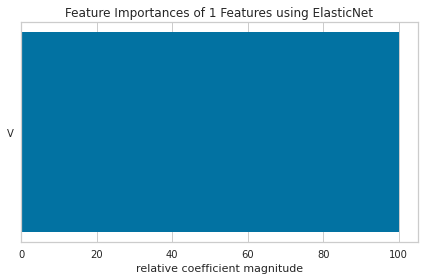

In [51]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

#### Check columns that should be dropped

In [52]:
print(dropped_cols)

[]


## Splittings 

In [53]:
df = df_copy

#### Splitting dataframe in features and targets

In [54]:
y = df[target_col]

In [55]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [56]:
nb_features = len(X.columns.tolist())

In [57]:
nb_targets = 1

In [58]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [59]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [60]:
cat_selector = make_column_selector(dtype_include=object)

In [61]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [62]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [63]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=0, add_indicator=True))

In [64]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [65]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [66]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=0, add_indicator=True), StandardScaler())

In [67]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Level-0 models

In [68]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse'))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error'))), 
          ('DTRP', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='poisson'))), 
          ('RFRS', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=50))), 
          ('RFRA', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=50))), 
          ('RFRP', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='poisson', n_estimators=50))), 
          ('ABR', make_pipeline(tree_preprocessor, AdaBoostRegressor())), 
          ('HGBR', make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(early_stopping=True))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR10', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPR20', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ]

##### Level-1 model

In [69]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Stacking for regression

In [70]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [71]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/philippe/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/philippe/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/philippe/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warn

CPU times: user 236 ms, sys: 107 ms, total: 343 ms
Wall time: 4.04 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                                    random_state=0)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9237b...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9237b3ff40>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor(weights='distance'))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

### Model evaluation

#### Model scoring

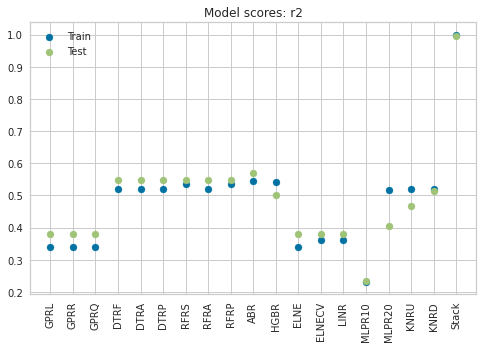

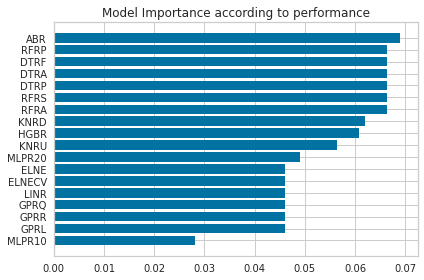

In [72]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

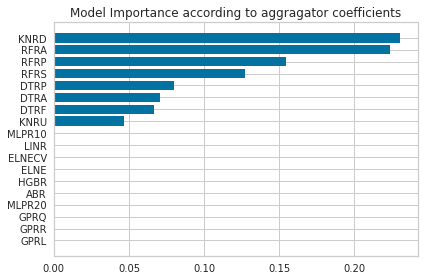

In [73]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

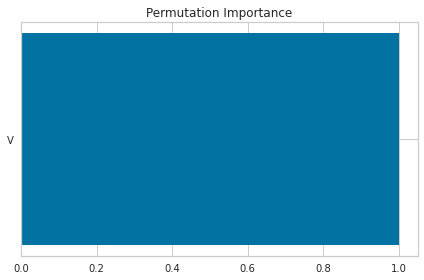

array([['V', 1.0]], dtype=object)

In [74]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [75]:
features_of_interest = []

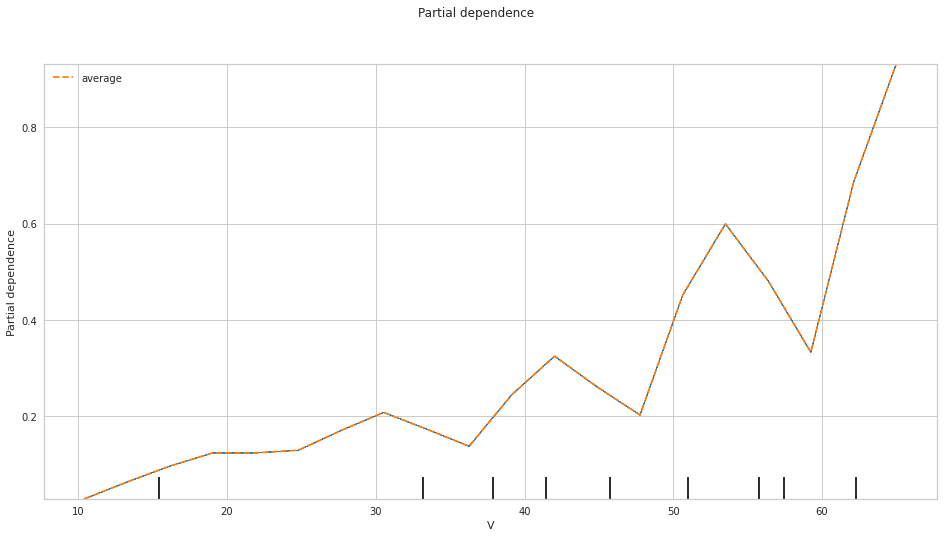

In [76]:
plot_partial_dependence(model, X_test, features_of_interest)

#### Residuals plot

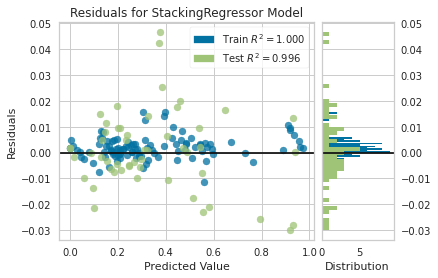

In [77]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

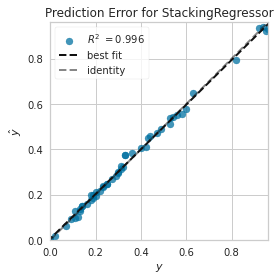

In [78]:
prediction_error(model, X_train, y_train, X_test, y_test);

### Final Model

In [86]:
threshold_model = 5

In [87]:
threshold_score = 0.55

##### Filtered Level-0 models

In [88]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [89]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Build final model

In [90]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [91]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 54.3 ms, sys: 74.7 ms, total: 129 ms
Wall time: 294 ms


StackingRegressor(estimators=[('ABR',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                                    random_state=0))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9237b68f40>),
                                                                                                 ('pipeline-2',
                                                                                                  Pipeline(steps=...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('ordinalencoder',
                                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                  unknown_value=-1))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9237b3ff40>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('adaboostregressor',
                                                AdaBoostRegressor())]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

#### Final Model scoring

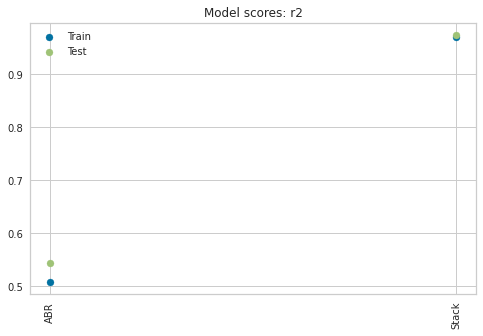

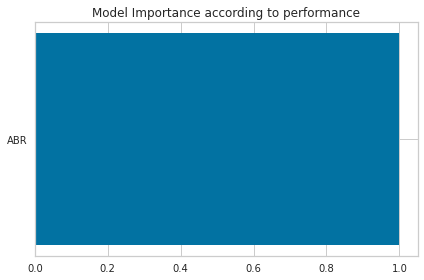

(array([['ABR', 0.508343407172996, 0.5437435897435897],
        ['Stack', 0.969595482659225, 0.9738729920100786]], dtype=object),
 array([['ABR', 1.0]], dtype=object))

In [92]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

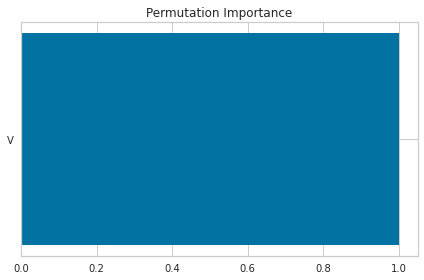

In [93]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [94]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [95]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [96]:
print(dropped_cols)

[]


#### Final Residuals plot

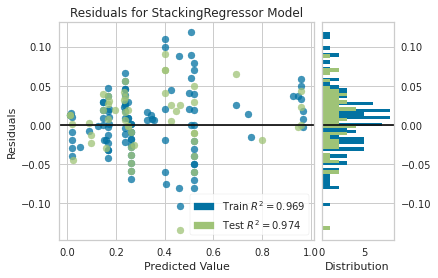

In [97]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Final Prediction error

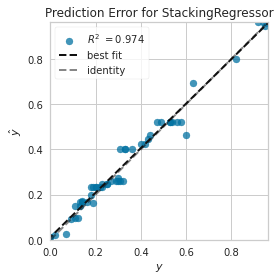

In [98]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Deployment

### Save your model

In [99]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [100]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)